<a href="https://colab.research.google.com/github/CIA-Oceanix/DLOA2023/blob/main/projects/notebook_data_loading_WeatherBench.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*italicized text*# Quickstart guide for WeatherBench dataset

Google colab notebook adapted from https://github.com/pangeo-data/WeatherBench.git

You can check the repo for an additional example of implementation of a simple CNN.

Check out the `environment.yml` in the repo file for the required Python packages.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [13]:
!git clone https://github.com/pangeo-data/WeatherBench.git

Cloning into 'WeatherBench'...
remote: Enumerating objects: 733, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 733 (delta 7), reused 14 (delta 7), pack-reused 715
Receiving objects: 100% (733/733), 17.78 MiB | 22.84 MiB/s, done.
Resolving deltas: 100% (431/431), done.


In [17]:
import os
os.chdir('./WeatherBench')

## Downloading the data

The data is hosted here. For this guide we will simply download the 500 hPa geopotential data (Z500).

In [3]:
# This might take a few minutes
!wget --no-check-certificate "https://dataserv.ub.tum.de/s/m1524895/download?path=%2F5.625deg%2Fgeopotential_500&files=geopotential_500_5.625deg.zip" -O geopotential_500_5.625deg.zip

--2023-06-25 09:14:22--  https://dataserv.ub.tum.de/s/m1524895/download?path=%2F5.625deg%2Fgeopotential_500&files=geopotential_500_5.625deg.zip
Resolving dataserv.ub.tum.de (dataserv.ub.tum.de)... 138.246.224.34, 2001:4ca0:800::8af6:e022
Connecting to dataserv.ub.tum.de (dataserv.ub.tum.de)|138.246.224.34|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 1532774663 (1.4G) [application/zip]
Saving to: ‘geopotential_500_5.625deg.zip’

geopotential_500_5. 100%[===================>]   1.43G  18.4MB/s    in 81s     

2023-06-25 09:15:44 (18.0 MB/s) - ‘geopotential_500_5.625deg.zip’ saved [1532774663/1532774663]



In [4]:
!mkdir -p geopotential_500
!unzip -d geopotential_500/ geopotential_500_5.625deg.zip

Archive:  geopotential_500_5.625deg.zip
  inflating: geopotential_500/geopotential_500hPa_1979_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1980_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1981_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1982_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1983_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1984_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1985_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1986_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1987_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1988_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1989_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1990_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1991_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1992_5.625deg

## Open the data

In [5]:
z500 = xr.open_mfdataset('geopotential_500/*.nc', combine='by_coords')

In [44]:
z500

<xarray.Dataset>
Dimensions:  (lon: 64, lat: 32, time: 350640)
Coordinates:
    level    int32 500
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    z        (time, lat, lon) float32 dask.array<chunksize=(8760, 32, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-10 20:33:23 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

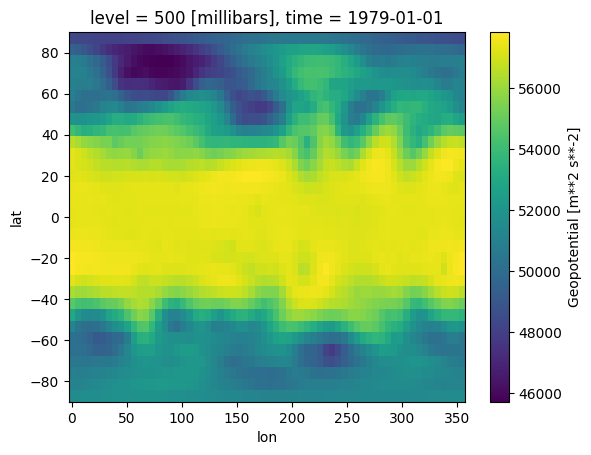

In [8]:
# Plot an example
z500.z.isel(time=0).plot();

In [46]:
# Selection of a subset of data for 2017 and 2018 only

z500_2017_2018 = z500.sel(time=slice('2017', '2018')).isel(time=slice(0, None, 12))

<xarray.Dataset>
Dimensions:  (lon: 64, lat: 32, time: 1460)
Coordinates:
    level    int32 500
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 2017-01-01 ... 2018-12-31T12:00:00
Data variables:
    z        (time, lat, lon) float32 dask.array<chunksize=(730, 32, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-10 20:33:23 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

## Create a simple climatological forecast

Remember that we are using the years 2017 and 2018 for testing/evaluation, so we are not allowed to use these years to train any data-driven model.

For more information on the climatology and persistence forecasts used in the paper check out `notebooks/1-climatology-persistence.ipynb`.

In [9]:
# To speed things up we will just take the mean for 2016
climatology = z500.sel(time=slice('2016', '2016')).mean('time').load()

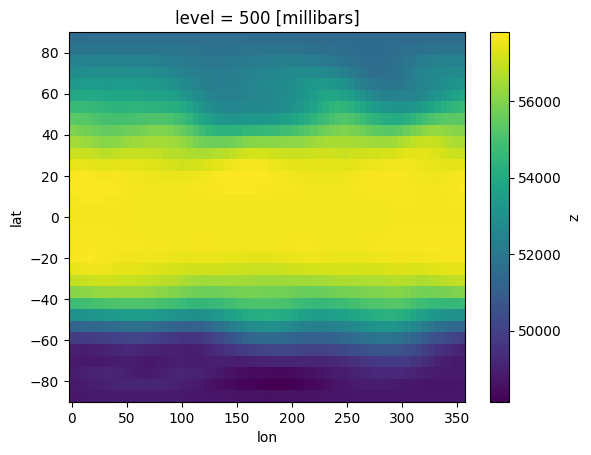

In [10]:
climatology.z.plot()

### Evaluate the climatology

Please check the paper for details on the evaluation metric. Here we will use the functions from `src/score.py`. To make sure we are always using the same targets for testing, we also implemented a function to load the test data.

In [18]:
from src.score import *

In [32]:
z500_test = load_test_data('geopotential_500/', 'z')[::12]  # Take data only every 12 hours to speed up computation on Binder

In [33]:
rmse_climatology = compute_weighted_rmse(climatology.z, z500_test).load()

In [34]:
rmse_climatology

<xarray.DataArray ()>
array(1079.88382283)
Coordinates:
    level    int32 500

So we get a climatological RMSE of 1080 m^2/s^2 which is very similar to the RMSE we get for the climatology for all training years.